In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

C:\Users\HP\AppData\Local\Temp\ipykernel_17972\787996909.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [2]:
#loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.shape


(2290, 6)

In [4]:
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
#to check any missing values 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
#getting statistical measures of the data
gold_data.describe()



,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
# Assuming 'Date' is a column in your DataFrame
# If 'Date' is not needed for correlation, you can exclude it
columns_for_correlation = gold_data.select_dtypes(include=[np.number]).columns
correlation = gold_data[columns_for_correlation].corr()


<Axes: >

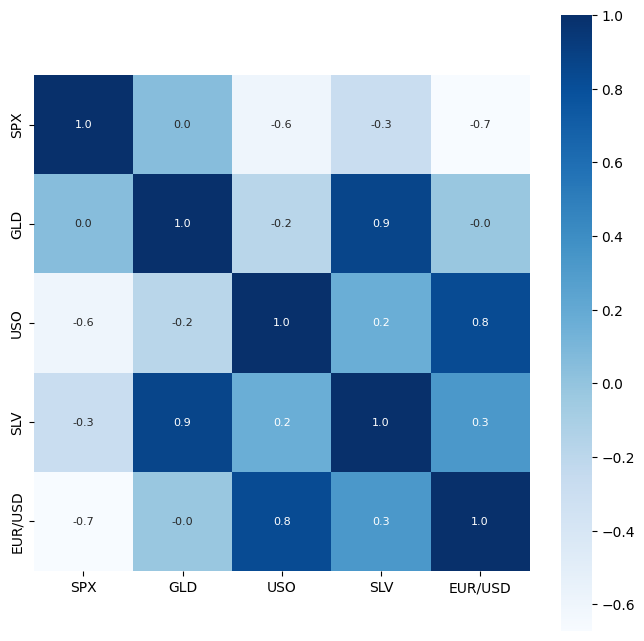

In [8]:
plt.figure (figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

In [9]:
#correlation values of GOLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_37160\3977905465.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'red')


<Axes: xlabel='GLD', ylabel='Density'>

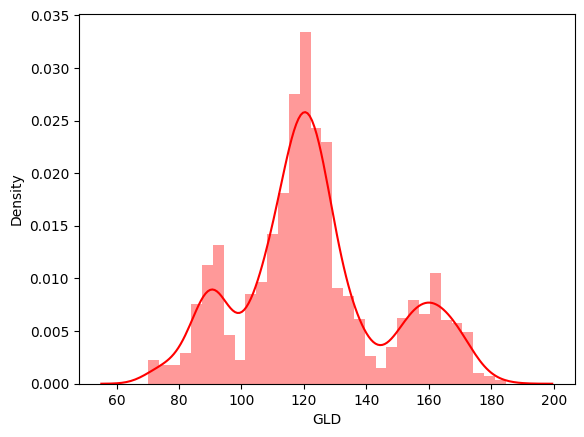

In [10]:
#checkin the distribution of the gold prices
sns.distplot(gold_data['GLD'], color = 'red')

In [11]:
#splitting the fearures and target
X = gold_data.drop(['Date','GLD'], axis = 1)
y = gold_data['GLD']

In [12]:
print(X)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [13]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
#splitting into training and testing data
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [15]:
#model Training(Random forest Regressor)
regressor = RandomForestRegressor(n_estimators = 100)

In [16]:
#training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [18]:
print(test_data_prediction)

[168.58509981  82.35059985 116.06860031 127.62080067 120.84000129
 154.71519803 150.61679817 126.08620017 117.57779872 125.95060087
 117.03570044 171.66250058 141.31019828 167.97919871 115.3314
 117.63540036 138.92200303 170.26020087 159.25980319 157.77489932
 154.9775997  124.8757     175.96819973 157.18210343 125.28800037
  93.82659961  78.33589981 120.44390001 119.08079932 167.51010004
  88.02630071 125.21140003  91.17840076 117.66060032 121.15869933
 136.12520071 115.40070113 115.29930103 147.7301994  107.13430106
 104.33930248  87.23519797 126.50760062 117.84409987 154.61539918
 119.55990058 108.50739952 107.96889849  93.15080031 127.15959762
  74.64760051 113.5723988  121.24560045 111.39789911 118.79939899
 120.64649952 160.17239904 168.65930022 147.05399686  85.74389856
  94.17040031  86.7017993   90.63600012 118.91620109 126.48600044
 127.39370017 169.52440038 122.17799905 117.43549891  98.31259995
 168.1999009  143.04739787 132.37440218 121.18280234 120.37309938
 119.65080028 

In [19]:
#r2_score
error_score = metrics.r2_score(y_test, test_data_prediction)

In [20]:
print (error_score)

0.9885164771492336


In [21]:
y_test = list(y_test)

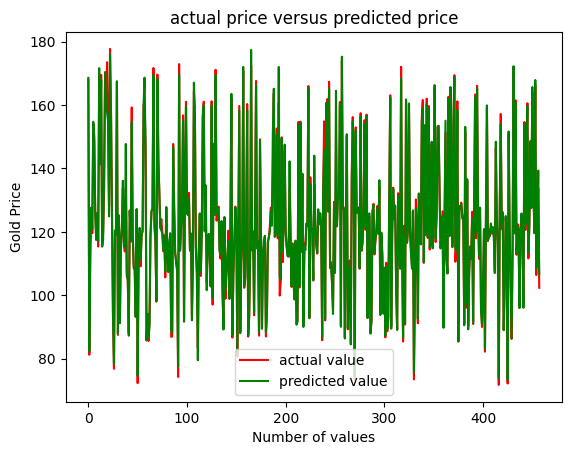

In [22]:
plt.plot(y_test, color = 'red', label = 'actual value' )
plt.plot(test_data_prediction, color = 'green', label = 'predicted value' )
plt.title('actual price versus predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [28]:
# User-friendly prediction function
import numpy as np
def predict_gold_price(user_year, user_month, user_day):
    input_data = np.array([[user_year, user_month, user_day]])
    prediction = model.predict(input_data)
    return prediction[0]

class SampleModel:
    def predict(self, input_data):
        # Placeholder prediction logic, replace this with your actual model prediction
        return test_data_prediction

model = SampleModel()  # Creating a sample model instance for demonstration


# Get user input for the date
user_year = int(input("Enter the year: "))
user_month = int(input("Enter the month: "))
user_day = int(input("Enter the day: "))

# Predict gold price using the user input
predicted_price = predict_gold_price(user_year, user_month, user_day)
print(f"Predicted gold price on {user_year}-{user_month:02d}-{user_day:02d}: ${predicted_price:.2f}")

Enter the year:  2007
Enter the month:  6
Enter the day:  3


Predicted gold price on 2007-06-03: $168.59
